OBJECTIVE


Perform data cleaning and exploratory data analysis (EDA) on a Titanic dataset from Kaggle.Explore the relationships between variables and identify patterns and
trends in the data.

In [497]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [498]:
#Load the dataset, let me call it titanic_df
titanic_df = pd.read_csv("C:/Users/USER/Desktop/Titanic-Dataset.csv")


In [499]:
#View the first 10 rows of the dataset
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [500]:
#Check the shape of the dataset
titanic_df.shape

(891, 12)

In [501]:
#Have a look at the description of the data
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [502]:
#Check more information of the dataset
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [503]:
#Check for Missing data across the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [513]:
#Since there are several missing values in "Age" column, I am going to fill in them using the median values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [515]:
#Lets confirm if the missing values in 'Age' column have been filled
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [517]:
#Fr 'Embarked' clumn, I am ging t fill in using the mode 
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [519]:
#Lets check if values were filled
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [527]:
# For 'Cabin' column, Display a sample to understand its content
print(titanic_df['Cabin'].head(15))


0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object


In [529]:
# Create 'Cabin_Indicator' to denote the presence of a cabin. Creates a numerical column where: 1 indicates cabin entry is present and  0 as missing.
titanic_df['Cabin_Indicator'] = titanic_df['Cabin'].notnull().astype(int)

# Display the first few rows to check if 'Cabin_Indicator' is created correctly
print(titanic_df[['Cabin', 'Cabin_Indicator']].head(10))

  Cabin  Cabin_Indicator
0   NaN                0
1   C85                1
2   NaN                0
3  C123                1
4   NaN                0
5   NaN                0
6   E46                1
7   NaN                0
8   NaN                0
9   NaN                0


In [531]:
# Drop the original 'Cabin' column
titanic_df.drop(columns=['Cabin'], inplace=True)

# Confirm the 'Cabin' column is dropped and 'Cabin_Indicator' exists
print(titanic_df.isnull().sum())


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Cabin_Indicator    0
dtype: int64


Since all the values are now available. I am going to carry out UNIVARIATE ANALYSIS

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age')

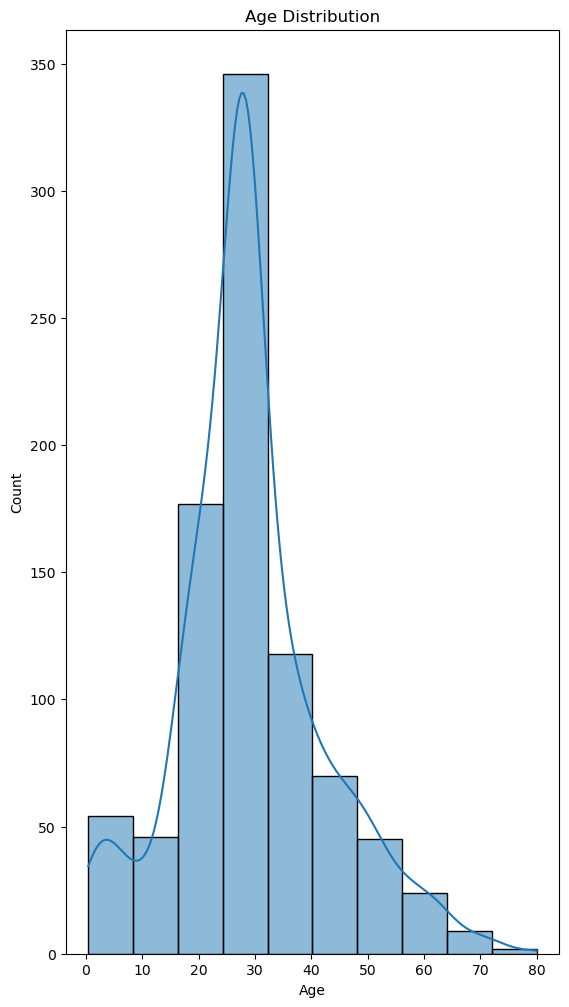

In [533]:
# Age distribution
plt.figure(figsize=(14, 12))
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


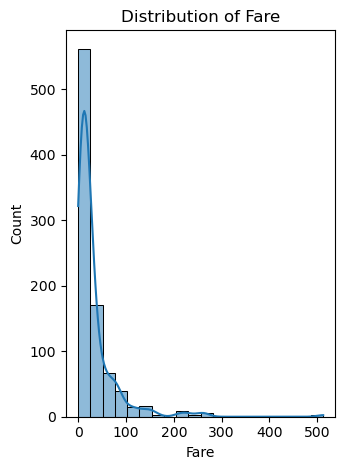

In [535]:
# Fare distribution
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['Fare'], kde=True, bins=20)
plt.title('Distribution of Fare')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()


BIVARIATE ANALYSIS

Explore Survival Rates Based on Key Features

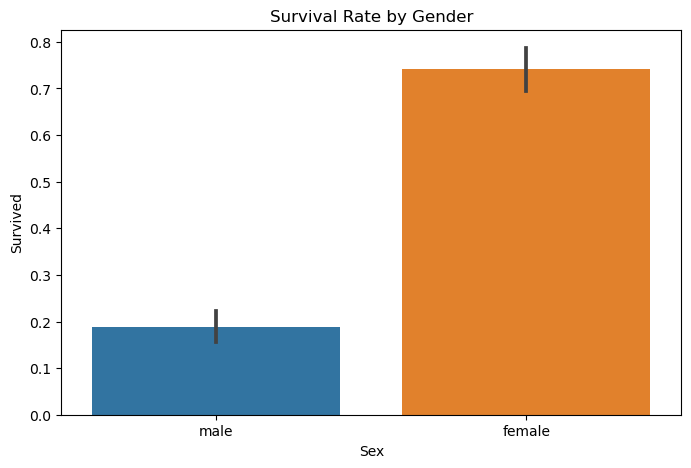

In [537]:
# Survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()


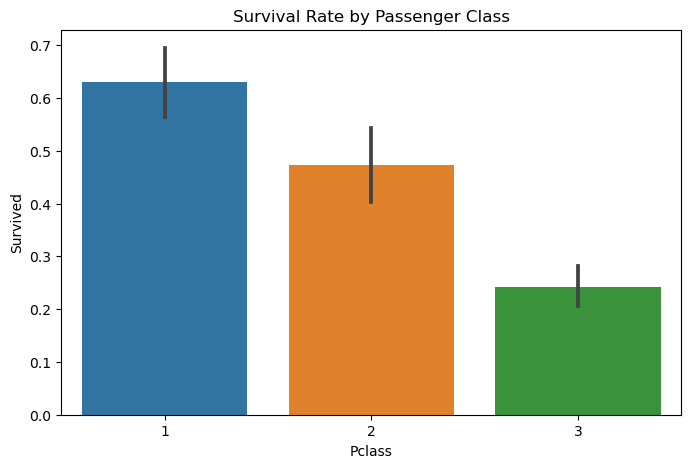

In [539]:
# Survival rates by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()



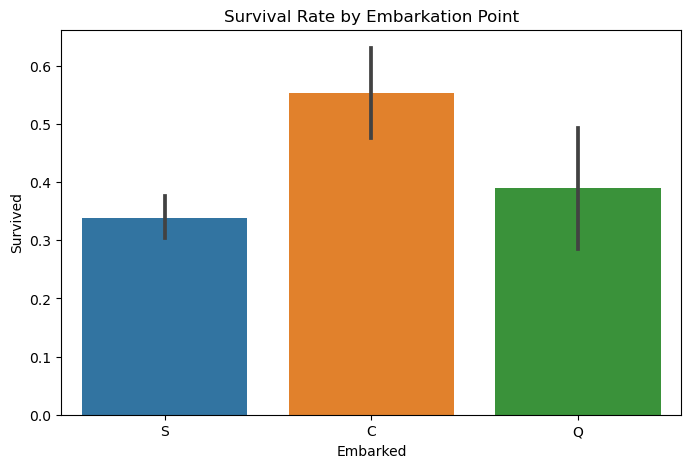

In [541]:
# Survival rates by embarkation point
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarkation Point')
plt.show()

UNIVARIATE ANALYSIS

Analyze Relationships Between Numerical Variables

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

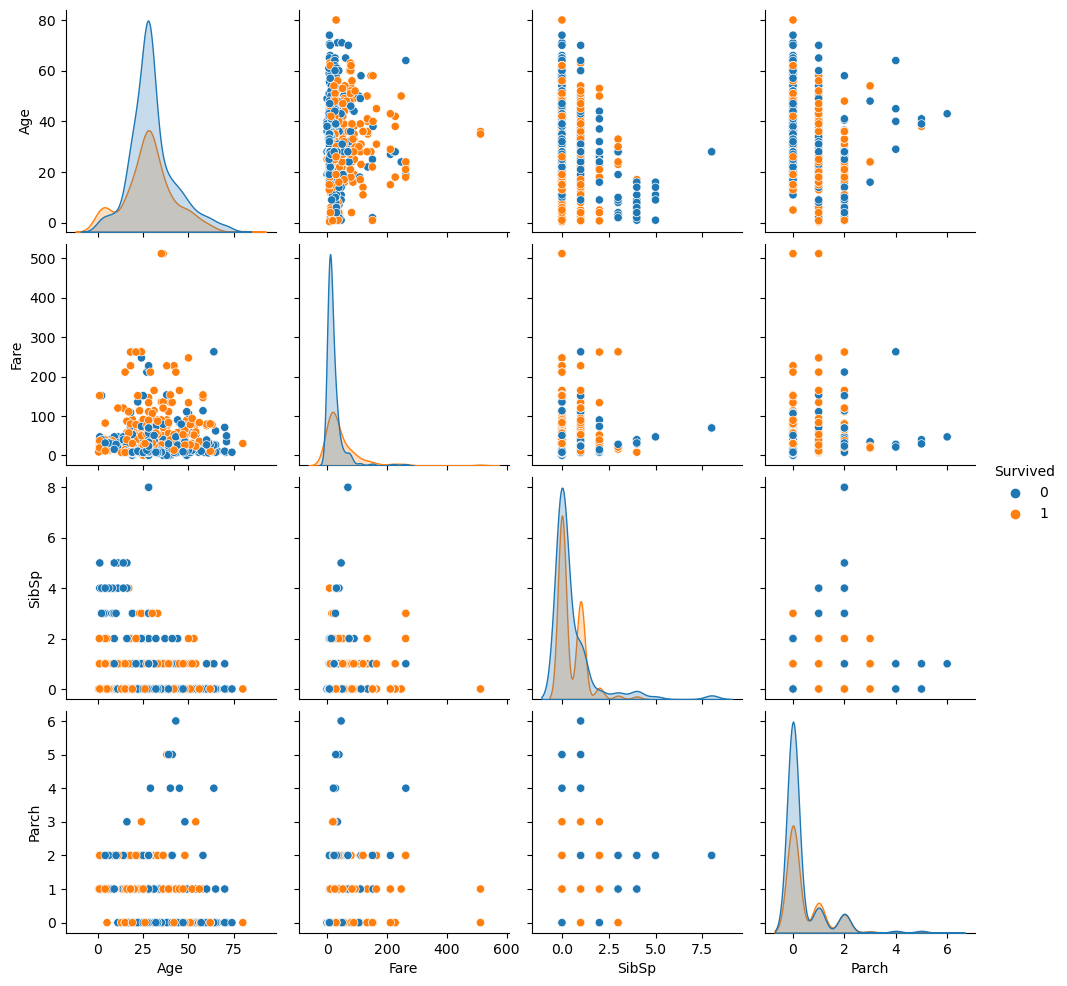

In [543]:
# Plot pairwise relationships between numerical variables
sns.pairplot(titanic_df, vars=['Age', 'Fare', 'SibSp', 'Parch'], hue='Survived')
plt.show()

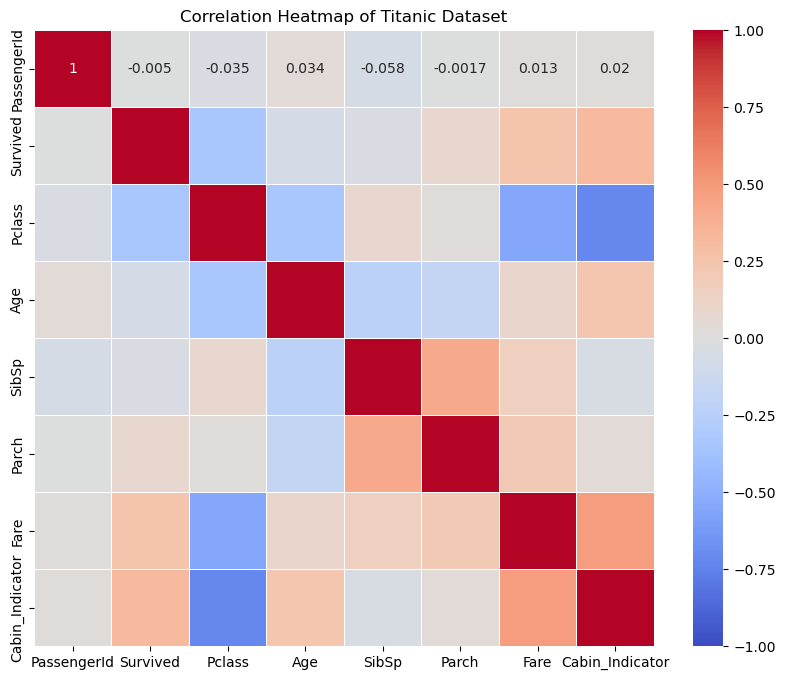

In [552]:
#HEATMAP
numeric_df = titanic_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

CORRELATION ANALYSIS

In [455]:
correlation = titanic_df[['Age', 'Fare']].corr()
print(correlation)

           Age      Fare
Age   1.000000  0.096688
Fare  0.096688  1.000000


CROSS-TABULATION

In [457]:
cross_tab = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


SUMMARY

The Titanic dataset shows that about 38% of passengers survived.
Women had a higher survival rate compared to men. 
First-class passengers had the highest survival rate (63%), while third-class passengers had the lowest (24%). 
Children had a higher survival rate, with around 50% surviving. 
Passengers traveling with family had a higher survival rate than those traveling alone.
Missing data is common in the Cabin field, and there are also missing values in Age and Embarked.